In [18]:
# !python3 -m pip install --upgrade pip
# !python3 -m pip install numpy matplotlib pymssql
!python3 -m pip install pyuff

642.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 KB 587.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 KB 7.8 MB/s eta 0:00:0000:01
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)


In [19]:
import matplotlib.pyplot as plt
import pymssql as mssql
import numpy as np
import struct
import pyuff

In [26]:
uff_file = pyuff.UFF('ObserverODSExport.uff')
data = uff_file.read_sets()


In [35]:
print(data)
print(data.keys())
print(len(data['x']))
print(len(data['data']))


{'type': 58, 'binary': 0, 'id1': 'Fourier Spectrum', 'id2': 'NONE', 'id3': '30-08-2022  03:00:01', 'id4': 'GB_HSS_H_VEL', 'id5': '', 'func_type': 12, 'func_id': 0, 'ver_num': 0, 'load_case_id': 0, 'rsp_ent_name': 'NONE', 'rsp_node': 0, 'rsp_dir': 1, 'ref_ent_name': 'NONE', 'ref_node': 0, 'ref_dir': 0, 'ord_data_type': 5, 'num_pts': 1601, 'abscissa_spacing': 1, 'abscissa_min': 0.0, 'abscissa_inc': 0.625, 'z_axis_value': 0.0, 'abscissa_spec_data_type': 18, 'abscissa_len_unit_exp': 0, 'abscissa_force_unit_exp': 0, 'abscissa_temp_unit_exp': 0, 'abscissa_axis_lab': 'NONE', 'abscissa_axis_units_lab': 'Hz', 'ordinate_spec_data_type': 12, 'ordinate_len_unit_exp': 0, 'ordinate_force_unit_exp': 0, 'ordinate_temp_unit_exp': 0, 'ordinate_axis_lab': 'Horizontal', 'ordinate_axis_units_lab': 'm/s2', 'orddenom_spec_data_type': 0, 'orddenom_len_unit_exp': 0, 'orddenom_force_unit_exp': 0, 'orddenom_temp_unit_exp': 0, 'orddenom_axis_lab': 'NONE', 'orddenom_axis_units_lab': 'NONE', 'z_axis_spec_data_type'

In [21]:
# url = 'DESKTOP-AKLQCEN'
url = '59.28.91.19:1433'
username='sa'
password='skf1234!'
database='Hangwon4'

In [202]:
# conn = mssql.connect(server = 'DESKTOP-AKLQCEN',  database = 'WTGSU113_Prototype_Beaksu_20170224')
conn = mssql.connect(server=url, user=username, password=password, database=database)
cursor = conn.cursor() # 쿼리 생성과 결과 조회를 위해 사용


In [203]:
def convertData(row, scaleFactor):
    result = []
    width = 2

    for idx in range(0, len(row), width):
        raw = row[idx:idx+width]
        # if r == True:
            # data = float(struct.unpack('>h', raw)[0])
        # else:
        data = float(struct.unpack('<h', raw)[0])
            
        result.append(data * scaleFactor)
    return np.array(result)

In [243]:
cursor.execute('SELECT *  FROM MeasurementBinaryRaw WHERE IDMeasurement=778096')

result = []

row = cursor.fetchone() # 쿼리 결과의 다음 행을 가져와 리턴
tmp1 = convertData(row[4], row[3])
print(len(row[4]))
print()
print()

# Phase Data
row = cursor.fetchone() # 쿼리 결과의 다음 행을 가져와 리턴
print(len(row[4]))
tmp3 = convertData(row[4], row[3])

# RealData
row = cursor.fetchone() # 쿼리 결과의 다음 행을 가져와 리턴
print(len(row[4]))
tmp5 = convertData(row[4], row[3])

3200


3200
8192


4096
0.00016301556085807078


/tmp/ipykernel_17813/2263889006.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.fft.rfft(data).astype('float32') / len(data)


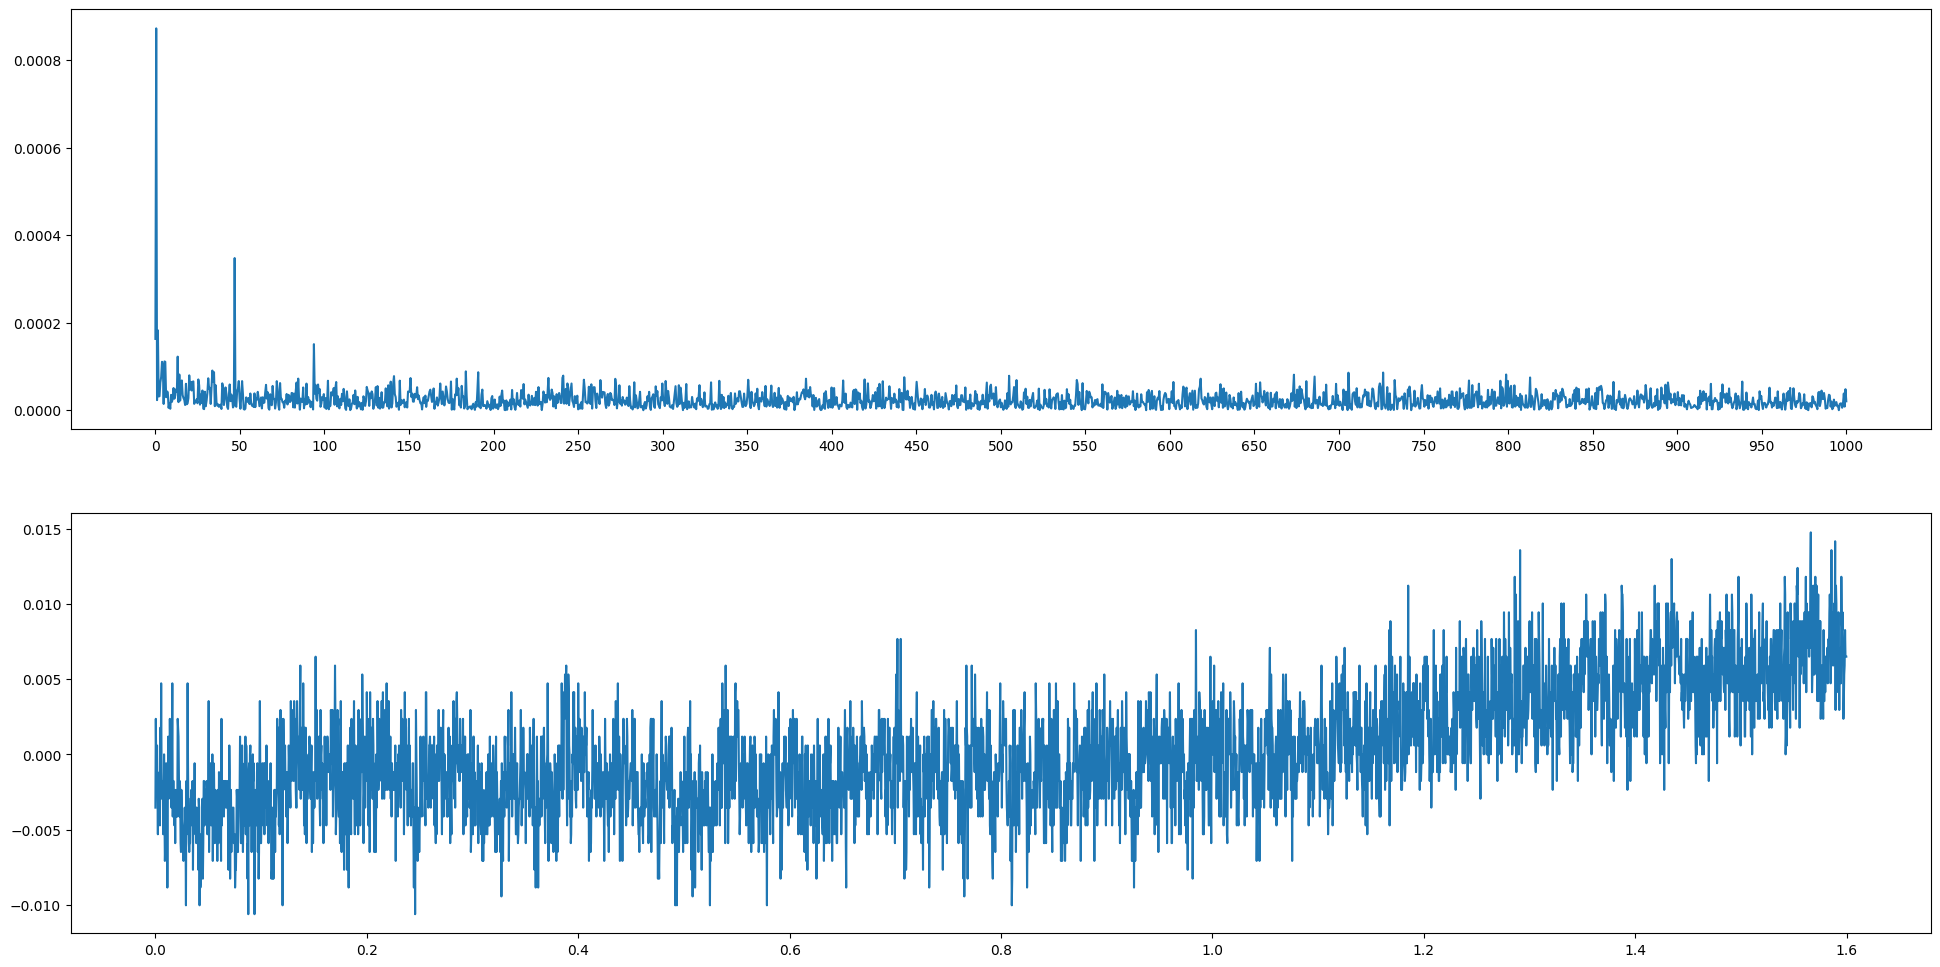

<Figure size 2400x600 with 0 Axes>

In [278]:
# a = [tmp1,tmp2, tmp3,tmp4,tmp5,tmp6]
a = [tmp5]


for item in a:
    print(len(item))
    plt.figure(figsize=(24,12))
    plt.subplot(2, 1, 1)
    print(item.mean())
    # data = item - item.mean()
    data = item
    x = np.fft.rfftfreq(len(data), 1/2000)
    y = np.fft.rfft(data).astype('float32') / len(data)
    z = np.abs(y)
    plt.plot(x, z)
    
    plt.xticks(np.arange(0,1001, 50))
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(len(item)) / 2560, item)
    plt.show()
    plt.figure(figsize=(24,6)) 



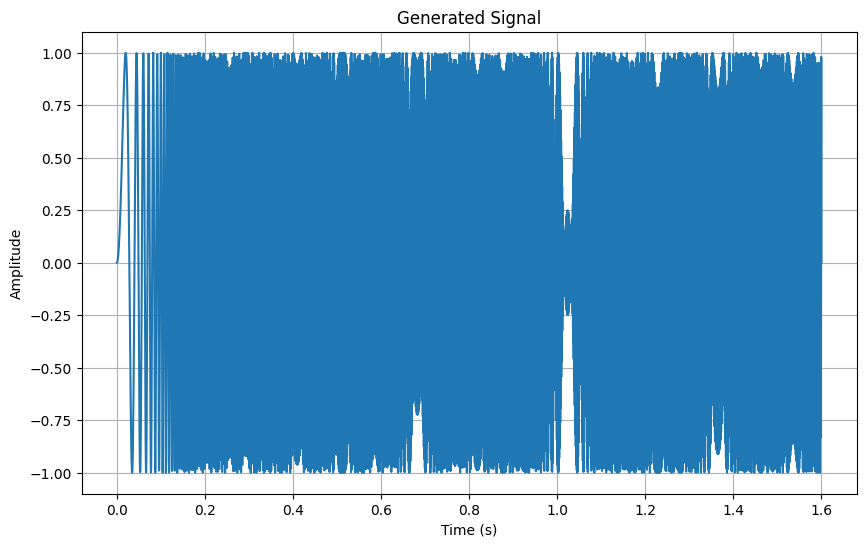

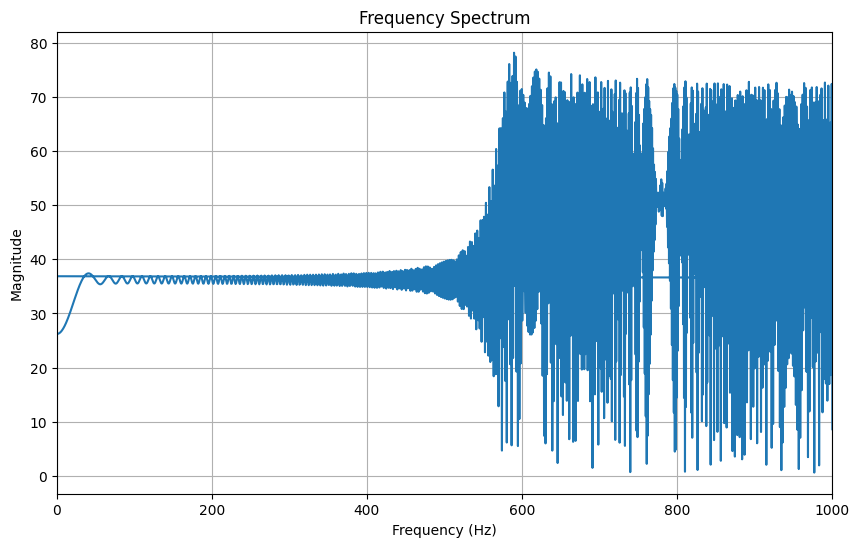

In [145]:
# Parameters
start_hz = 0
end_hz = 1000
sampling_data = 2560
duration = 1.6

# Generate time points based on the sampling rate and duration
time_points = np.linspace(0, duration, int(sampling_data * duration))

# Generate the signal with the specified frequency range
frequency_range = np.linspace(start_hz, end_hz, len(time_points))
signal = np.sin(2 * np.pi * frequency_range * time_points)

# Plot the signal in the time domain
plt.figure(figsize=(10, 6))
plt.plot(time_points, signal)
plt.title('Generated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Perform the Fourier Transform to show the frequency spectrum
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(time_points), time_points[1] - time_points[0])
magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitude)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 1000)  # Limit the x-axis to the specified range (0 Hz to 1000 Hz)
plt.grid(True)
plt.show()